<a href="https://colab.research.google.com/github/Onehundredpunches/AI-Final-Project-/blob/main/Predict__Gender_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from numpy import save
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from os import listdir
from PIL import Image
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.layers.attention.multi_head_attention import activation
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
folder = '/content/drive/MyDrive/Last AI Report/Dataset/Gender/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 2.0
  if file.startswith('Female'):
    output = 1.0
  if file.startswith('Male'):
    output = 0.0
  photo = load_img(folder+file, target_size = (150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(5563, 150, 150, 3) (5563,)


In [8]:
# Save data 
np.save('/content/drive/MyDrive/Last AI Report/Model/Gender_Face_photos.npy', photos)
np.save('/content/drive/MyDrive/Last AI Report/Model/Gender_Face_labels.npy', labels)

In [11]:
# Load data
photos = np.load('/content/drive/MyDrive/Last AI Report/Model/Gender_Face_photos.npy')
labels = np.load('/content/drive/MyDrive/Last AI Report/Model/Gender_Face_labels.npy')

In [12]:
# split train data, test data

X_train, X_test, Y_train, Y_test = train_test_split(photos, labels, test_size=0.1, random_state=3)

In [13]:
X_train.shape

(5006, 150, 150, 3)

In [14]:
Y_train.shape

(5006,)

In [15]:
X_test.shape

(557, 150, 150, 3)

In [16]:
Y_test.shape

(557,)

In [17]:
# Standardized data

X_train = X_train.astype('float32')/255
Y_train = to_categorical(Y_train, 3)

X_test = X_test.astype('float32')/255
Y_test = to_categorical(Y_test, 3)

In [18]:
Y_train.shape

(5006, 3)

In [19]:
Y_test.shape

(557, 3)

In [20]:
model = Sequential()
model.add(Conv2D(input_shape=(150, 150, 3), filters=96, kernel_size=(7, 7), strides=(2, 2), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(-1))
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(-1))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(-1))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=3, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 72, 96)        14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 36, 36, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 256)      0         
 2D)                                                             
                                                        

In [22]:
aug = ImageDataGenerator(rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [23]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit_generator(aug.flow(X_train, Y_train, batch_size=65),
                              epochs=20, validation_data=aug.flow(X_test,Y_test, batch_size=65))

<ipython-input-23-17859d32a3a5>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(X_train, Y_train, batch_size=65),


Epoch 1/20
78/78 [==============================] - 50s 496ms/step - loss: 2.0872 - accuracy: 0.5825 - val_loss: 0.7440 - val_accuracy: 0.5458
Epoch 2/20
78/78 [==============================] - 34s 438ms/step - loss: 0.7794 - accuracy: 0.6342 - val_loss: 0.6778 - val_accuracy: 0.5763
Epoch 3/20
78/78 [==============================] - 34s 437ms/step - loss: 0.6321 - accuracy: 0.6790 - val_loss: 0.7086 - val_accuracy: 0.5171
Epoch 4/20
78/78 [==============================] - 34s 434ms/step - loss: 0.5692 - accuracy: 0.7089 - val_loss: 0.6069 - val_accuracy: 0.6625
Epoch 5/20
78/78 [==============================] - 36s 466ms/step - loss: 0.5640 - accuracy: 0.7189 - val_loss: 0.5779 - val_accuracy: 0.6840
Epoch 6/20
78/78 [==============================] - 34s 436ms/step - loss: 0.5331 - accuracy: 0.7373 - val_loss: 0.6720 - val_accuracy: 0.6445
Epoch 7/20
78/78 [==============================] - 34s 440ms/step - loss: 0.5173 - accuracy: 0.7477 - val_loss: 0.5838 - val_accuracy: 0.7074

In [24]:
# Save model
model.save('/content/drive/MyDrive/Last AI Report/Model/Predict_Gender_model.h5')

Test loss:  0.3687165081501007
Test accuracy 0.8348294496536255


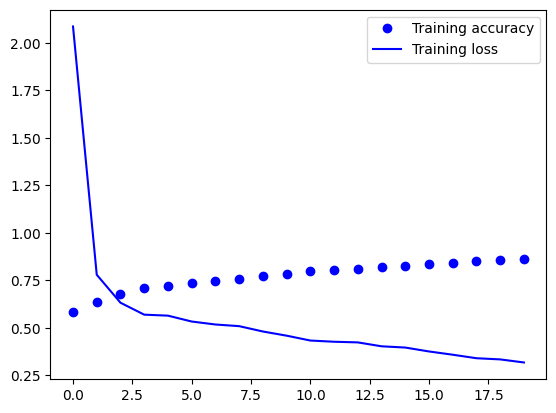

In [25]:
test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss: ', test[0])
print('Test accuracy', test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

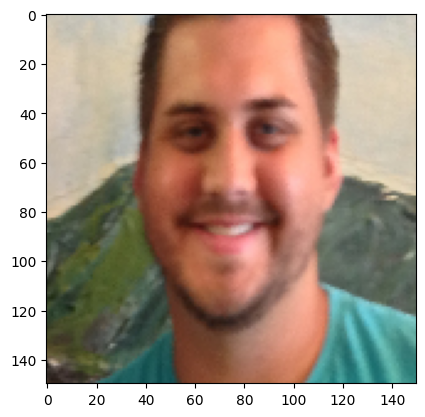

[1. 0. 0.]


In [72]:
# Use testmodel to evalute trainmodel

# Load photo in testmodel
img = X_test[362]
plt.imshow(img)
plt.show()
print(Y_test[362])

In [74]:
X_pred = X_test[362].reshape(1,150,150,3)
X_pred=X_pred.astype('float32')/255
matrix = np.argmax(model.predict(X_pred))
class_names = ["Female","Male", "Don't know"]

class_predict = matrix
print("Predict Gender: ", class_names[class_predict])

1/1 [==============================] - 0s 101ms/step
Predict Gender:  Male


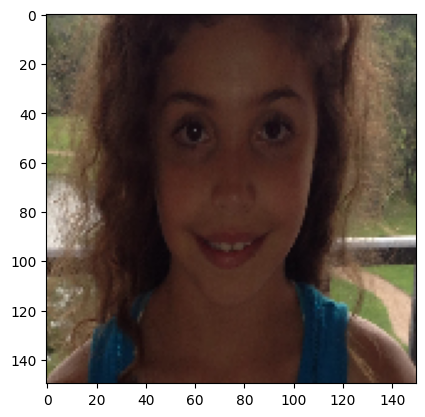

[0. 1. 0.]


In [84]:
# Load photo in testmodel
img = X_test[55]
plt.imshow(img)
plt.show()
print(Y_test[55])

In [85]:
X_pred = X_test[55].reshape(1,150,150,3)
X_pred=X_pred.astype('float32')/255
matrix = np.argmax(model.predict(X_pred))
class_names = ["Male","Female", "Don't know"]

class_predict = matrix
print(class_predict)
print("Predict Gender: ", class_names[class_predict])

1/1 [==============================] - 0s 22ms/step
1
Predict Gender:  Female


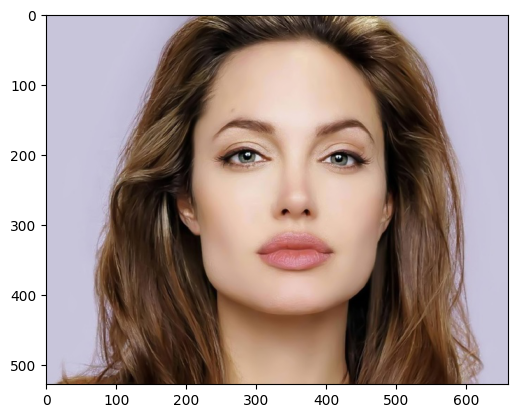

In [50]:
# #IMPORT A PICTURE FOR MODEL PREDICT
url = '/content/Angelina_1.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 45ms/step
Predict Gender:  Female


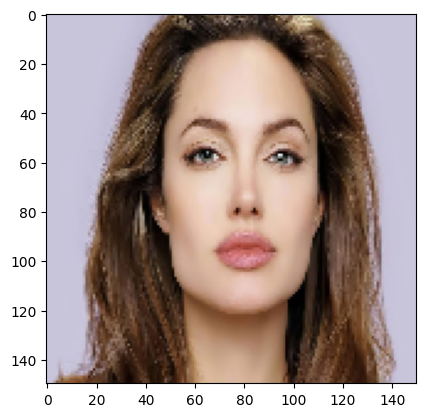

In [57]:
img = load_img(url, target_size = (150,150,3))
plt.imshow(img)

img = img_to_array(img)
img = img.astype('float32')
img = img/255
img = np.expand_dims(img, axis=0)
matrix = np.argmax(model.predict(img))
class_names = ["Male","Female", "Don't know"]

class_predict = matrix
print("Predict Gender: ", class_names[class_predict])

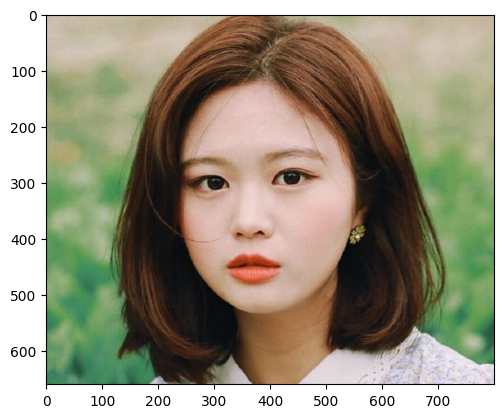

In [34]:
url = '/content/cac-kieu-khuon-mat-phu-nu-5.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 25ms/step
Predict Gender:  Female


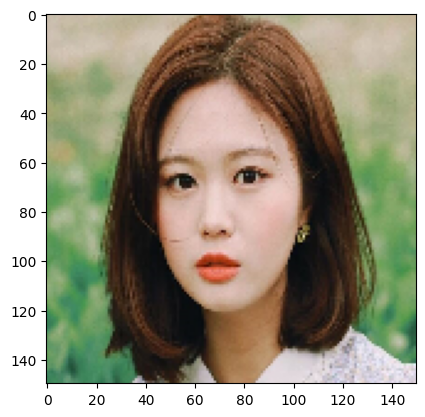

In [35]:
img = load_img(url, target_size = (150,150,3))
plt.imshow(img)

img = img_to_array(img)
img = img.astype('float32')
img = img/255
img = np.expand_dims(img, axis=0)
matrix = np.argmax(model.predict(img))
class_names = ["Male","Female","Don't know"]

class_predict = matrix
print("Predict Gender: ", class_names[class_predict])

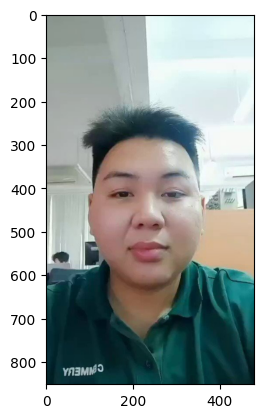

In [36]:
url = '/content/cuong.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 37ms/step
Predict Gender:  Male


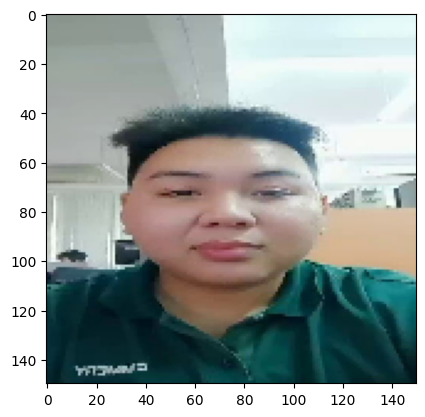

In [37]:
img = load_img(url, target_size = (150,150,3))
plt.imshow(img)

img = img_to_array(img)
img = img.astype('float32')
img = img/255
img = np.expand_dims(img, axis=0)
matrix = np.argmax(model.predict(img))
class_names = ["Male","Female","Don't know"]

class_predict = matrix
print("Predict Gender: ", class_names[class_predict])